In [1]:
import pandas as pd 
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

In [2]:
data = pd.read_csv('../FINAL DATASET/CVD/CVD_CDC.csv')

In [3]:
data.head()

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [4]:
y = data['HeartDisease']

In [5]:
x = data.drop(columns =['HeartDisease','Unnamed: 0','Race'], axis = 1)

In [6]:
x.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,0,1,4,8.0,0,0,0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = .2, random_state = 44)

In [76]:
scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
t1= scaler.fit_transform(X_test)    
ss = scaler.fit(X_test)

In [ ]:
import joblib
joblib.dump(ss,'scaler')

In [51]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)
    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [9]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9050485467252458
Precision: 0.34594594594594597
Recall: 0.12926918839515242
F1 Score: 0.1882101323352493
Cohens Kappa Score: 0.14877768549176118
Area Under Curve: 0.7055655318934716
Confusion Matrix:
 [[57182  1331]
 [ 4742   704]]


In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [11]:
gnb_eval = evaluate_model(gnb, X_test, y_test)

# Print result
print('Accuracy:', gnb_eval['acc'])
print('Precision:', gnb_eval['prec'])
print('Recall:', gnb_eval['rec'])
print('F1 Score:', gnb_eval['f1'])
print('Cohens Kappa Score:', gnb_eval['kappa'])
print('Area Under Curve:', gnb_eval['auc'])
print('Confusion Matrix:\n', gnb_eval['cm'])

Accuracy: 0.8476680373364186
Precision: 0.2688044764876789
Recall: 0.4586852735952993
F1 Score: 0.33896465160458644
Cohens Kappa Score: 0.2594497719351667
Area Under Curve: 0.8018721183516325
Confusion Matrix:
 [[51718  6795]
 [ 2948  2498]]


In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
    n_estimators=10, criterion="entropy", random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [20]:
rfc_eval = evaluate_model(rfc, X_test, y_test)

# Print result
print('Accuracy:', rfc_eval['acc'])
print('Precision:', rfc_eval['prec'])
print('Recall:', rfc_eval['rec'])
print('F1 Score:', rfc_eval['f1'])
print('Cohens Kappa Score:', rfc_eval['kappa'])
print('Area Under Curve:', rfc_eval['auc'])
print('Confusion Matrix:\n', rfc_eval['cm'])

Accuracy: 0.9035632201879329
Precision: 0.32075471698113206
Recall: 0.11861917003305178
F1 Score: 0.17319034852546916
Cohens Kappa Score: 0.1333454593478438
Area Under Curve: 0.7332154449213268
Confusion Matrix:
 [[57145  1368]
 [ 4800   646]]


In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8666333119654779
Precision: 0.22994746059544657
Recall: 0.24109438119720897
F1 Score: 0.23538902832556474
Cohens Kappa Score: 0.16237925590180657
Area Under Curve: 0.5838455603015207
Confusion Matrix:
 [[54116  4397]
 [ 4133  1313]]


In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.max_iter=10000
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [23]:
lr_eval = evaluate_model(lr, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.915086227114245
Precision: 0.5074626865671642
Recall: 0.09364671318398825
F1 Score: 0.1581150209269881
Cohens Kappa Score: 0.13517069056283937
Area Under Curve: 0.8292613678781792
Confusion Matrix:
 [[58018   495]
 [ 4936   510]]


In [53]:
y_pred = lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.to_numpy().reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


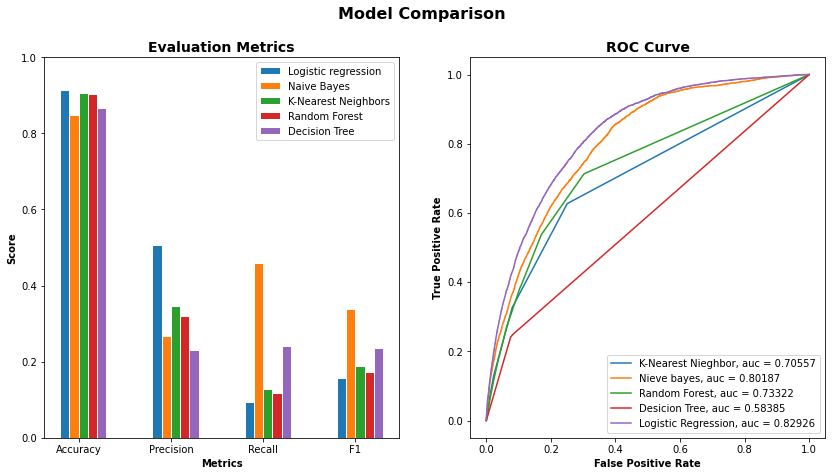

In [21]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]
gnb_score = [gnb_eval['acc'], gnb_eval['prec'], gnb_eval['rec'], gnb_eval['f1']]
rfc_score = [rfc_eval['acc'], rfc_eval['prec'], rfc_eval['rec'], rfc_eval['f1']]
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
lr_score  = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1']]



## Set position of bar on X axis
r1 = np.arange(len(lr_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]




## Make the plot
ax1.bar(r1, lr_score, width=barWidth, edgecolor='white', label='Logistic regression')
ax1.bar(r2, gnb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r3, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r4, rfc_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r5, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(lr_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(gnb_eval['fpr'], gnb_eval['tpr'], label='Nieve bayes, auc = {:0.5f}'.format(gnb_eval['auc']))
ax2.plot(rfc_eval['fpr'], rfc_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rfc_eval['auc']))
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Desicion Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [ ]:
temp=[[27.20,0,0,0,0.0,0.0,0,1,9,0,0,2,6.0,0,0,0]]
inp=pd.DataFrame(temp, columns = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
                                'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
                                'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
                                'SkinCancer'])
sc = joblib.load('./scaler')
t2=sc.transform(inp)

In [97]:
import joblib
joblib.dump(lr,'CVD_CDC_LR')

['CVD_CDC_LR']

In [98]:
ll = joblib.load('./CVD_CDC_LR')
ans = ll.predict(t2)

In [15]:
importances = lr.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X_train.columns.values[indices[f]], importances[indices[f]]))



AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'